In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras

In [2]:
train_df = pd.read_csv("/fashion-mnist_train.csv")
test_df = pd.read_csv("/fashion-mnist_test.csv")

In [6]:
train_df.shape

(60000, 785)

In [7]:
test_df.shape

(10000, 785)

In [9]:
classes = train_df['label'].unique()
classes

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [10]:
class_name = ['t-shirt' ,'trouser' ,'pullover' ,'dress','coat','sandal','shirt','sneaker','bag','ankleboot']

In [11]:
x_train = train_df .iloc[: ,1 :].to_numpy()
x_train =x_train.reshape([-1 ,28,28,1])
x_train = x_train /255

In [12]:
y_train = train_df.iloc[: ,0].to_numpy()

In [13]:
x_test = test_df.iloc[: ,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test /255

In [14]:
y_test = test_df.iloc[:, 0].to_numpy()

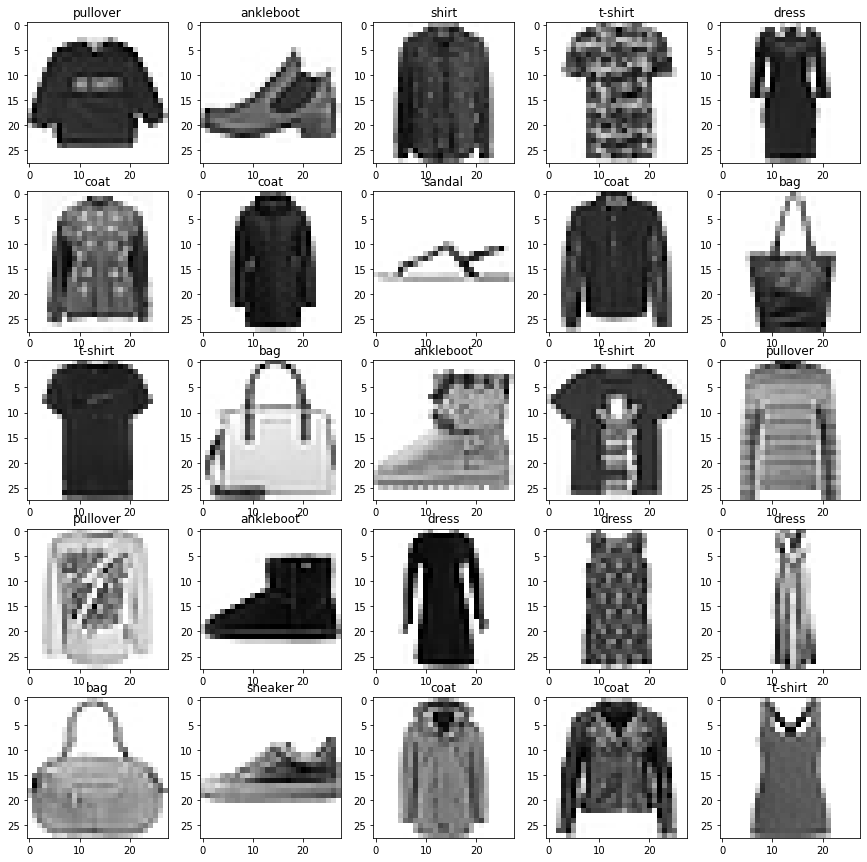

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize =(15,15) )
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.title(class_name[y_train[i]])
    plt.imshow(x_train[i] ,cmap = plt.cm.binary)
plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,BatchNormalization

In [17]:
# The model starts with a 2D convolutional layer with 32 filters, each having a size of 3x3. The activation function used is ReLU
# BatchNormalization => normalize the inputs of each layer
# Dropout is a regularization technique which help to prevent overfitting
# The flatten layer is used to convert the 2D feature maps into a 1D vector, as required by the dense layers
# The model includes two dense (fully connected) layers
# The output layer consists of 10 units, corresponding to the 10 possible classes in the classification task
# MaxPooling2D layer: This layer performs max pooling with a 2x2 pool size, which reduces the spatial dimensions of the output by a factor of 2.

# First Convolutional layer
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization())

# Second Convolutional layer
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Third Convolutional layer
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

# Forth Convolutional layer
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Flatten layer
cnn.add(Flatten())

# First Dense layer
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

# Second Dense layer
cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

# Output layer
cnn.add(Dense(10, activation='softmax'))

In [19]:
cnn.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics= ['accuracy'])

In [ ]:
history=cnn.fit(x_train, y_train , batch_size =1200 , epochs= 15 , validation_split= 0.05)

Epoch 1/15
48/48 [==============================] - 74s 2s/step - loss: 0.9345 - accuracy: 0.6836 - val_loss: 2.5478 - val_accuracy: 0.0983
Epoch 2/15
27/48 [===============>..............] - ETA: 34s - loss: 0.5548 - accuracy: 0.7979

In [ ]:
evaluate_model=cnn. evaluate(x_test,y_test)

In [ ]:
y_pred = cnn.predict(x_test)

In [ ]:
y_pred

In [ ]:
train_loss, train_acc = cnn.evaluate(x_train, y_train)
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, 3))
print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

In [ ]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()